In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('batting_leaders.csv')

In [3]:
df.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Aaron Judge,NYY,142,631,59,122,127,16,14.6%,25.0%,...,0.419,0.701,0.461,0.457,210,1.7,79.7,-0.4,10.4,15640
1,Paul Goldschmidt,STL,139,606,35,103,112,6,12.5%,21.1%,...,0.411,0.599,0.430,0.372,184,3.3,62.9,-15.8,7.1,9218
2,Nolan Arenado,STL,137,578,29,70,98,5,8.1%,11.8%,...,0.358,0.543,0.384,0.343,153,-1.5,34.3,12.4,6.9,9777
3,Freddie Freeman,LAD,144,644,20,106,94,12,10.9%,14.4%,...,0.405,0.525,0.396,0.409,159,6.2,50.5,-8.0,6.7,5361
4,Manny Machado,SDP,136,584,29,90,92,7,9.8%,19.9%,...,0.365,0.531,0.380,0.339,149,3.0,36.8,5.2,6.5,11493


In [4]:
df.columns

Index(['Name', 'Team', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB%', 'K%', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'xwOBA', 'wRC+', 'BsR', 'Off',
       'Def', 'WAR', 'playerid'],
      dtype='object')

In [45]:
X = df[["RBI"]].to_numpy()

In [46]:
# view the correlation coefficient (R) for each pair of variables
# R is the square root of R-squared
# A correlation matrix helps select features that are highly predictive of our dependent variable
# It also helps us identify collinearity between independent variables
corr = df.corr()
corr.head()

,G,PA,HR,R,RBI,SB,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
G,1.000000,0.829192,0.264908,0.516927,0.441460,0.139430,0.142853,0.085836,0.191947,0.175500,0.205378,0.203405,0.139919,0.221285,0.208384,0.316181,0.132110,0.409241,0.149367
PA,0.829192,1.000000,0.447717,0.773802,0.621024,0.119305,0.326504,0.206109,0.355516,0.394110,0.433089,0.458134,0.401998,0.453548,0.163063,0.529110,-0.024178,0.530460,0.053407
HR,0.264908,0.447717,1.000000,0.578971,0.821157,-0.078436,0.963147,-0.088883,0.104629,0.276539,0.859923,0.678430,0.660235,0.659142,-0.005549,0.667378,-0.179433,0.524207,-0.019107
R,0.516927,0.773802,0.578971,1.000000,0.637084,0.250458,0.532423,0.278543,0.466509,0.573559,0.656143,0.689552,0.566778,0.670267,0.340085,0.764785,0.031891,0.738359,-0.033110
RBI,0.441460,0.621024,0.821157,0.637084,1.000000,-0.013188,0.783560,0.161238,0.375069,0.391313,0.828441,0.703983,0.601019,0.676942,0.061134,0.702710,-0.114185,0.601266,-0.019271


<AxesSubplot:>

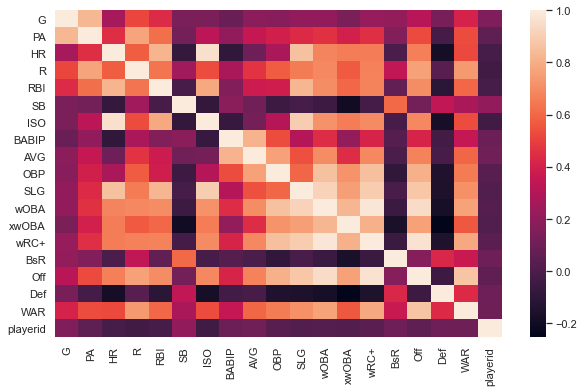

In [47]:
sns.heatmap(corr)

In [48]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

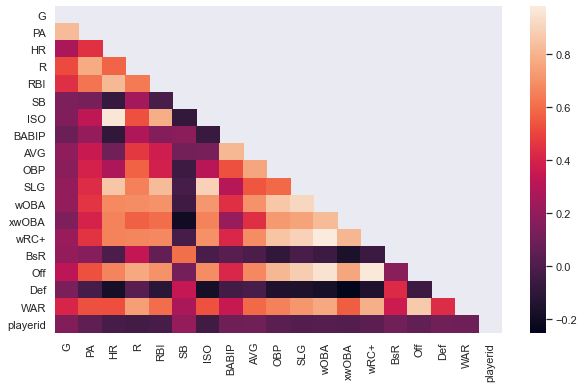

In [49]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(corr, mask=mask)


In [50]:
corr["RBI"]

G           0.441460
PA          0.621024
HR          0.821157
R           0.637084
RBI         1.000000
SB         -0.013188
ISO         0.783560
BABIP       0.161238
AVG         0.375069
OBP         0.391313
SLG         0.828441
wOBA        0.703983
xwOBA       0.601019
wRC+        0.676942
BsR         0.061134
Off         0.702710
Def        -0.114185
WAR         0.601266
playerid   -0.019271
Name: RBI, dtype: float64

In [51]:
y = df[["SLG", "wRC+", "PA"]]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. Preview data
1. Select model
1. Select features to include in model
1. Split data into train and test sets
1. Fit the model to the training set
1. Create predictions for the test set
1. Score the model based on the training and test sets

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

y = m1x1 + m2x2 + m3x3 + b

dependent variable = coefficient * independent variable + intercept

In [55]:
coef = model.coef_
print(coef)

[[0.00272978]
 [0.82655689]
 [1.6427472 ]]


In [56]:
intercept = model.intercept_
print(intercept)

[2.52409789e-01 6.08905325e+01 4.35785621e+02]


Easier way to create the predicted data:

In [57]:
pred_y = model.predict(X_train)
pred_y

array([[3.88898725e-01, 1.02218377e+02, 5.17922981e+02],
       [3.97088061e-01, 1.04698048e+02, 5.22851222e+02],
       [4.95360094e-01, 1.34454096e+02, 5.81990122e+02],
       [3.94358282e-01, 1.03871491e+02, 5.21208475e+02],
       [3.97088061e-01, 1.04698048e+02, 5.22851222e+02],
       [4.78981422e-01, 1.29494754e+02, 5.72133638e+02],
       [4.87170758e-01, 1.31974425e+02, 5.77061880e+02],
       [4.32575184e-01, 1.15443287e+02, 5.44206936e+02],
       [3.99817839e-01, 1.05524605e+02, 5.24493970e+02],
       [4.05277397e-01, 1.07177718e+02, 5.27779464e+02],
       [4.05277397e-01, 1.07177718e+02, 5.27779464e+02],
       [3.97088061e-01, 1.04698048e+02, 5.22851222e+02],
       [4.73521864e-01, 1.27841641e+02, 5.68848144e+02],
       [3.99817839e-01, 1.05524605e+02, 5.24493970e+02],
       [4.68062307e-01, 1.26188527e+02, 5.65562650e+02],
       [4.68062307e-01, 1.26188527e+02, 5.65562650e+02],
       [3.83439167e-01, 1.00565263e+02, 5.14637486e+02],
       [5.17198324e-01, 1.41066

In [58]:
y_test_pred = model.predict(X_test)

In [59]:
train_score = model.score(X_train, y_train)

In [60]:
test_score = model.score(X_test, y_test)

In [61]:
# R-squared value
train_score

0.49043544000137446

In [62]:
test_score

0.5474659801354301

In [63]:
from statsmodels.api import OLS

In [64]:
model2 = OLS(X_train, y_train)

In [65]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              962.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                    1.52e-72
Time:                        19:20:10   Log-Likelihood:                         -394.10
No. Observations:                 101   AIC:                                      794.2
Df Residuals:                      98   BIC:                                      802.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SLG          180.6098     37.457      4.822      0.000     106.278     254.942
wRC+          -0.0280      0.105     -0.266      0.791      -0.236       0.181
PA            -0.0176      0.016     -1.073      0.286      -0.050       0.015
==============================================================================
Omnibus:                        7.986   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.617
Skew:                           0.642   Prob(JB):                       0.0222
Kurtosis:                       3.403   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
y = df[["SLG", "PA"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [68]:
train_score

0.5122535774455997

In [69]:
test_score

0.5909360477929538

In [70]:
model2 = OLS(X_train, y_train)

In [71]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1458.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                    3.64e-74
Time:                        19:21:00   Log-Likelihood:                         -394.13
No. Observations:                 101   AIC:                                      792.3
Df Residuals:                      99   BIC:                                      797.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SLG          172.2393     20.273      8.496      0.000     132.013     212.466
PA            -0.0168      0.016     -1.048      0.297      -0.049       0.015
==============================================================================
Omnibus:                        7.779   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.407
Skew:                           0.637   Prob(JB):                       0.0246
Kurtosis:                       3.367   Cond. No.                     9.14e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
y = df[["SLG"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [74]:
train_score

0.6898499174022765

In [75]:
test_score

0.6580988381371495